# Kutlwano Ngwarati Regression Predict

Exploring which Regression model will returns the lowest RMSE. 

The five models that will be explored include:

    * K Nearest Neighbour
    * Decision Trees
    * Random Forests
    * Support Vector Machines
    * Mulifactor Linear Regression
    

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline

## Connect to Cloud Database

In [2]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Kutlwano'

connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

sql_query1 = "Select * from claims_data"
sql_query2 = "Select * from test_set"

df_claims = pd.read_sql_query(sql_query1, connection)
df_test = pd.read_sql_query(sql_query2, connection)

In [3]:
# Considering only policyholders who claimed
df_claims = df_claims[df_claims['insurance_claim'] == 'yes']

## Changing cells to numeric format

In [4]:
df_claims['bmi'] = pd.to_numeric(df_claims['bmi'])
df_claims['children'] = pd.to_numeric(df_claims['children'])
df_claims['steps'] = pd.to_numeric(df_claims['steps'])
df_claims['age'] = pd.to_numeric(df_claims['age'])
df_claims['claim_amount'] = pd.to_numeric(df_claims['claim_amount'])

## Pre-processing

In [5]:
# Labeling
df_claims_minus = df_claims.drop(['insurance_claim', 'claim_amount'], axis=1)
df_test_minus_index = df_test.drop(['row_id'], axis=1)

#Concatenating the two tables
df_combined = pd.concat([df_claims_minus, df_test_minus_index],sort=False).reset_index(drop=True)

# Lables
y = df_claims['claim_amount']

# Features
X = df_claims.drop(['insurance_claim', 'claim_amount'], axis=1)

# Index
r = df_test['row_id']

We only want to consider policyholders who claimed:

## Transforming the data

In [6]:
# Transform the data
combined_transformed = pd.get_dummies(df_combined, drop_first=True)

# Split the transformed data
X_transformed = combined_transformed.iloc[:len(y), :]
test_transformed = combined_transformed.iloc[len(y):, :]

# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=50)

## KNN Training

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### Predicting

In [8]:
pred_knn = knn.predict(X_test)

### Testing

In [9]:
from sklearn.metrics import mean_squared_error

Actual vs Expected Graph

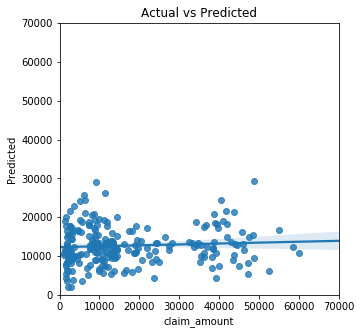

In [10]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_knn)

RMSE

In [11]:
print('RMSE:', mean_squared_error(y_test, pred_knn) ** 0.5)

RMSE: 15702.243658783713


### Tuning Parameters to Improve Model

#### Train

In [12]:
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_20 = KNeighborsRegressor(n_neighbors=20)

In [13]:
knn_3.fit(X_train, y_train)
knn_5.fit(X_train, y_train)
knn_20.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

#### Predict

In [14]:
pred_knn_3 = knn_3.predict(X_test)
pred_knn_5 = knn_5.predict(X_test)
pred_knn_20 = knn_20.predict(X_test)

#### Test

Actual vs Expected Graph

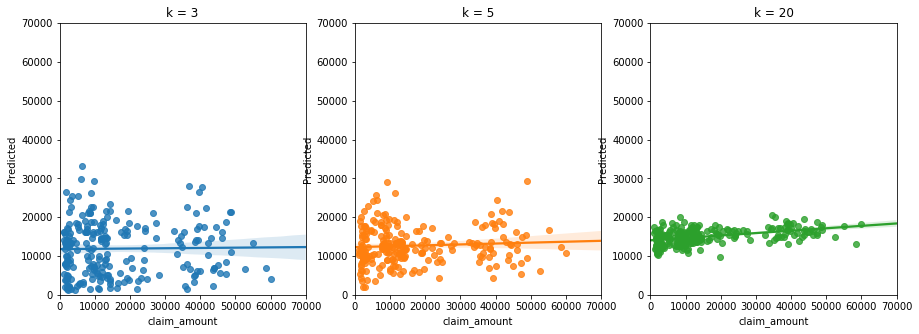

In [15]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_knn_3, pred_knn_5, pred_knn_20]
title = ['k = 3', 'k = 5', 'k = 20']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i]) 

RMSE

In [16]:
print('RMSE:')
print('k=3:', mean_squared_error(y_test, pred_knn_3) ** 0.5)
print('k=5:', mean_squared_error(y_test, pred_knn_5) ** 0.5)
print('k=20:', mean_squared_error(y_test, pred_knn_20) ** 0.5)

RMSE:
k=3: 16887.020948107318
k=5: 15702.243658783713
k=20: 14069.811031102165


## Decision Trees Training

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=50)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

### Predicting

In [18]:
pred_tree = tree.predict(X_test)

### Testing

In [19]:
from sklearn.metrics import mean_squared_error

Actual vs Expected Graph

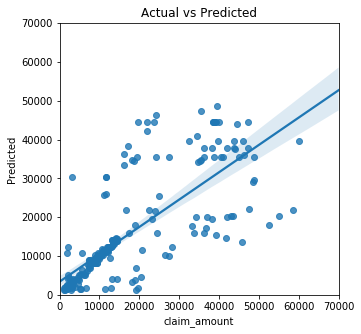

In [20]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_tree)

RMSE

In [21]:
print('RMSE:', mean_squared_error(y_test, pred_tree) ** 0.5)

RMSE: 9788.662281866891


### Tuning parameters to Improve Model

#### Train

In [22]:
tree_1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=50)
tree_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=50)
tree_3 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, random_state=50)

In [23]:
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)
tree_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

#### Predict

In [24]:
pred_tree_1 = tree_1.predict(X_test)
pred_tree_2 = tree_2.predict(X_test)
pred_tree_3 = tree_3.predict(X_test)

#### Test

Actual vs Expected Graph

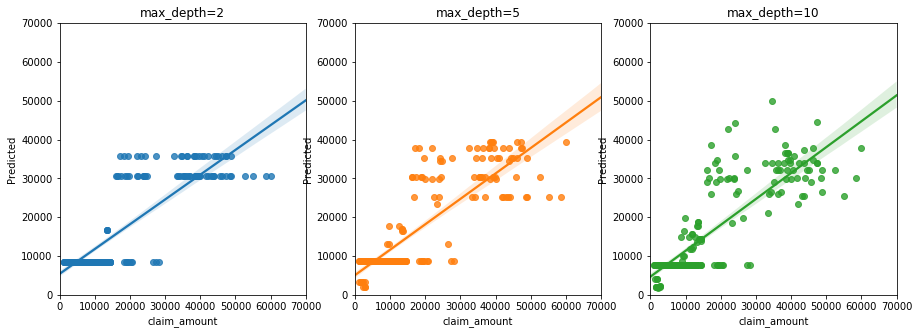

In [25]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_tree_1, pred_tree_2, pred_tree_3]
title = ['max_depth=2', 'max_depth=5', 'max_depth=10']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [26]:
print('RMSE:')
print('max_depth=2', mean_squared_error(y_test, pred_tree_1) ** 0.5)
print('max_depth=5', mean_squared_error(y_test, pred_tree_2) ** 0.5)
print('max_depth=10', mean_squared_error(y_test, pred_tree_3) ** 0.5)

RMSE:
max_depth=2 7910.206074432461
max_depth=5 7950.929977935941
max_depth=10 7997.073031698803


## Random Forests Training

### Training

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=50)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

### Predicting

In [28]:
pred_forest = forest.predict(X_test)

### Testing

Actual vs Expected

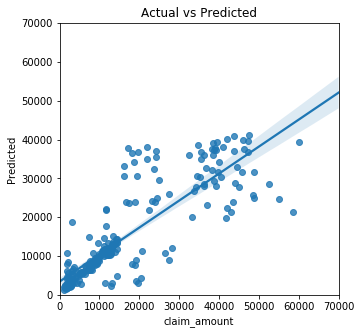

In [29]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_forest)

RMSE

In [30]:
print('RMSE:', mean_squared_error(y_test, pred_forest) ** 0.5)

RMSE: 7996.550079783138


### Tuning parameters to Improve Model

#### Train

In [31]:
# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=50)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=50)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=50)

In [32]:
forest_1.fit(X_train, y_train)
forest_2.fit(X_train, y_train)
forest_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

#### Predict

In [33]:
pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

#### Test

Actual vs Expected Graph

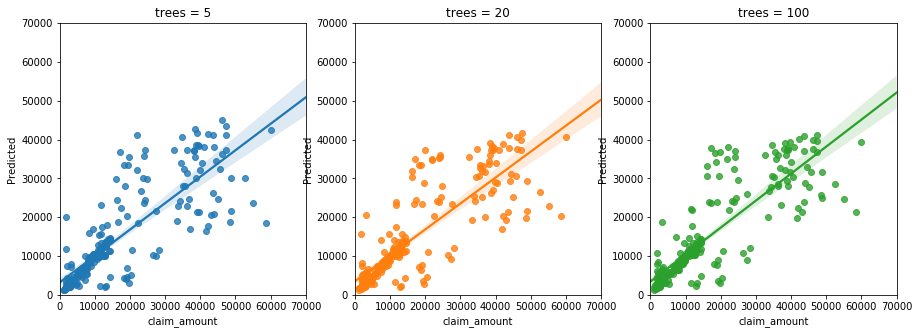

In [34]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i]) 

RMSE

In [35]:
print('RMSE:')
print('trees=5:', mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', mean_squared_error(y_test, pred_forest_3) ** 0.5)

RMSE:
trees=5: 8531.880273444287
trees=20: 8436.56366749446
trees=100: 7996.550079783138


## Support Vector Machines Training

### Training

This process of fitting a decision tree to our data can be done in Scikit-Learn with the SVR estimator:

In [36]:
from sklearn.svm import SVR
svm = SVR(kernel='linear', C=500, gamma=50)
svm.fit(X_train, y_train)

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=50,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting

In [37]:
pred_svm = svm.predict(X_test)

### Testing

Actual vs Expected Graph

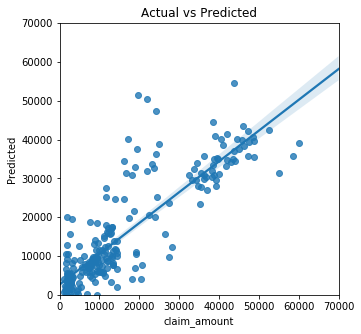

In [38]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_svm)

RMSE

In [39]:
print('RMSE:', mean_squared_error(y_test, pred_svm) ** 0.5)

RMSE: 7941.192326753242


### Tuning parameters to Improve Model

#### Train

In [40]:
# kernel=linear, C=100, gamma=20
svm_1 = SVR(kernel='linear', C=100, gamma=20)

# kernel=rbf, C=10, gamma=0.01
svm_2 = SVR(kernel='rbf', C=10, gamma=0.01)

# kernel=poly, C=20, gamma=1
svm_3 = SVR(kernel='poly', C=20, gamma=1)

In [41]:
svm_1.fit(X_train, y_train)
svm_2.fit(X_train, y_train)
svm_3.fit(X_train, y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predict

In [42]:
pred_svm_1 = svm_1.predict(X_test)
pred_svm_2 = svm_2.predict(X_test)
pred_svm_3 = svm_3.predict(X_test)

#### Test

Actual vs Expected Graph

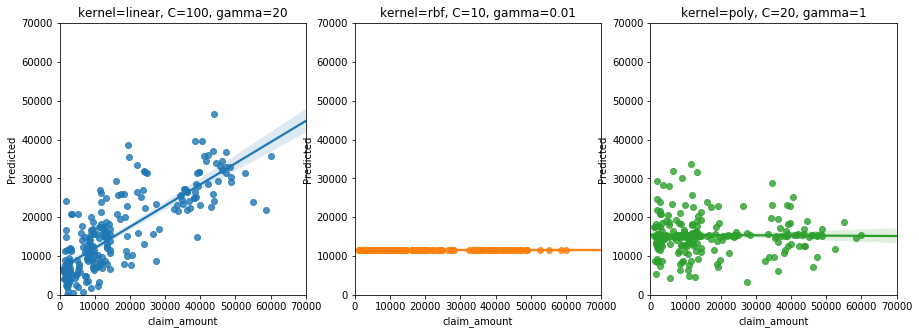

In [43]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_svm_1, pred_svm_2, pred_svm_3]
title = ['kernel=linear, C=100, gamma=20', 'kernel=rbf, C=10, gamma=0.01', 'kernel=poly, C=20, gamma=1']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [44]:
print('RMSE:')
print('kernel=linear, C=100, gamma=20:', mean_squared_error(y_test, pred_svm_1) ** 0.5)
print('kernel=rbf, C=10, gamma=0.01:', mean_squared_error(y_test, pred_svm_2) ** 0.5)
print('kernel=poly, C=20, gamma=1:', mean_squared_error(y_test, pred_svm_3) ** 0.5)

RMSE:
kernel=linear, C=100, gamma=20: 9216.707044832985
kernel=rbf, C=10, gamma=0.01: 15593.348065229722
kernel=poly, C=20, gamma=1: 15665.026558792903


## Multifactor Linear Regression Model Training

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

In [46]:
lm = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=100)

#### Training

In [47]:
lm.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso'])

,Intercept
Linear,2.239668e+16
Ridge,1.634645e+04
Lasso,1.635343e+04


In [49]:
# Create dataframe for coefficents of linear model
lm_coef = pd.DataFrame(lm.coef_,index=X_transformed.columns,columns=['Linear'])

# Create dataframe for coefficents of ridge model
ridge_coef = pd.DataFrame(ridge.coef_,index=X_transformed.columns,columns=['Ridge'])

# Create dataframe for coefficents of lasso model
lasso_coef = pd.DataFrame(lasso.coef_,index=X_transformed.columns,columns=['Lasso'])

# Put dataframes together
pd.concat([lm_coef, ridge_coef, lasso_coef], axis=1)

,Linear,Ridge,Lasso
age_19,689.138092,-230.609178,-579.037167
age_20,696.961700,4.809816,-449.956576
age_21,555.792564,-106.554793,-132.712436
age_22,-216.142315,-327.154497,-0.000000
age_23,-429.092830,-731.318504,-401.458121
...,...,...,...
children_5,0.000000,0.000000,0.000000
smoker_yes,14281.405759,12066.194348,11813.026317
region_northwest,-231.513998,-719.938163,-459.411593
region_southeast,-1866.950062,-503.697775,0.000000


#### Predicting

In [50]:
pred_lm = lm.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)

#### Test

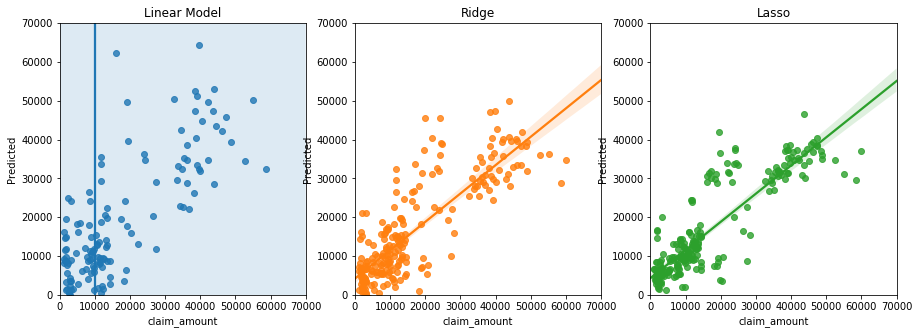

In [51]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_lm, pred_ridge, pred_lasso]
title = ['Linear Model', 'Ridge', 'Lasso']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])

In [52]:
print('RMSE:')
print('Linear:', metrics.mean_squared_error(y_test, pred_lm) ** 0.5)
print('Ridge:', metrics.mean_squared_error(y_test, pred_ridge) ** 0.5)
print('Lasso:', metrics.mean_squared_error(y_test, pred_lasso) ** 0.5)

RMSE:
Linear: 2.781496348536532e+18
Ridge: 8375.011461390282
Lasso: 7367.618348392891


## Print all Results to Determine the best model

In [53]:
print('KNN RMSE:')
print('k=3:', mean_squared_error(y_test, pred_knn_3) ** 0.5)
print('k=5:', mean_squared_error(y_test, pred_knn_5) ** 0.5)
print('k=20:', mean_squared_error(y_test, pred_knn_20) ** 0.5)

print('Decision Tree RMSE:')
print('max_depth=2', mean_squared_error(y_test, pred_tree_1) ** 0.5)
print('max_depth=5', mean_squared_error(y_test, pred_tree_2) ** 0.5)
print('max_depth=10', mean_squared_error(y_test, pred_tree_3) ** 0.5)

print('Random Forest RMSE:')
print('trees=5:', mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', mean_squared_error(y_test, pred_forest_3) ** 0.5)

print('SVM RMSE:')
print('kernel=linear, C=100, gamma=20:', mean_squared_error(y_test, pred_svm_1) ** 0.5)
print('kernel=rbf, C=10, gamma=0.01:', mean_squared_error(y_test, pred_svm_2) ** 0.5)
print('kernel=poly, C=20, gamma=1:', mean_squared_error(y_test, pred_svm_3) ** 0.5)

print('MLR RMSE:')
print('Linear:', metrics.mean_squared_error(y_test, pred_lm) ** 0.5)
print('Ridge:', metrics.mean_squared_error(y_test, pred_ridge) ** 0.5)
print('Lasso:', metrics.mean_squared_error(y_test, pred_lasso) ** 0.5)

KNN RMSE:
k=3: 16887.020948107318
k=5: 15702.243658783713
k=20: 14069.811031102165
Decision Tree RMSE:
max_depth=2 7910.206074432461
max_depth=5 7950.929977935941
max_depth=10 7997.073031698803
Random Forest RMSE:
trees=5: 8531.880273444287
trees=20: 8436.56366749446
trees=100: 7996.550079783138
SVM RMSE:
kernel=linear, C=100, gamma=20: 9216.707044832985
kernel=rbf, C=10, gamma=0.01: 15593.348065229722
kernel=poly, C=20, gamma=1: 15665.026558792903
MLR RMSE:
Linear: 2.781496348536532e+18
Ridge: 8375.011461390282
Lasso: 7367.618348392891


## According to the results above, Lasso has the lowest RMSE

The Linear model gives a MSE reuslt that is too low in comparision to the other models therefore we can conclude that the results are unreliable and can be discarded.

In [54]:
from sklearn.linear_model import Lasso

test_lm = LinearRegression()
test_lm.fit(X_train,y_train)
test_pred_lasso = lasso.predict(X_test)

test_pred_lasso

array([ 9090.07187553,  6318.86627827, -6104.24560575, 31159.70616056,
        5748.03501217, 11095.93390687, 13141.18498584, 31470.70340643,
        5037.76349017,  5035.93999904, 36979.00452011, 10794.4077273 ,
        7033.18558597, 15285.51494213,  3784.98640832, 26994.5088639 ,
       30100.6154054 , 46483.38912976, 29944.84377424, 28840.77575953,
        8579.38241865, 37706.45405084, 14221.00855934,  8515.20833796,
       12232.34461578, 14832.77731555,  9542.80950211, 11746.09273237,
        8815.44845167, 23832.59253571, 13518.6556374 ,  8934.00893675,
        4739.13094645,  9542.80950211,  4346.98758407,  6789.80343833,
       11838.31222015, 16111.76900079,  6641.38939648, 37374.08266526,
       30493.86357263, 17928.77032665,  9746.97961468, 16573.84114458,
        8379.53498258,  7485.92321256, 30951.75238128, 34086.45292406,
        6531.88648761, 36751.61217038,  6104.66582961,  4702.73655409,
        7164.94660341, 10625.36573706,  5166.63803038,  3064.48732325,
      

## Sending the Model to SQL

In [56]:
FinalModel = pd.DataFrame({'row_id':range(0, len(test_pred_lasso)),'prediction': test_pred_lasso})
FinalModel

,row_id,prediction
0,0,9090.071876
1,1,6318.866278
2,2,-6104.245606
3,3,31159.706161
4,4,5748.035012
...,...,...
230,230,34685.823266
231,231,4034.243828
232,232,38235.618175
233,233,38959.960189


In [57]:
FinalModel.to_sql('regression_model_results', con=connection, if_exists='append', index=False,method='multi',chunksize=500)

In [58]:
connection.table_names()

['claims_data',
 'classification_model_predict',
 'football_players',
 'regression_model_results',
 'test_set']